In [136]:
import numpy as np

In [182]:
# A = np.matrix([[4, 11, 14], [8, 7, -2]])
A = np.matrix([
    [3, 2, 2],
    [2, 3, -2]
])
A, A.T

(matrix([[ 3,  2,  2],
         [ 2,  3, -2]]),
 matrix([[ 3,  2],
         [ 2,  3],
         [ 2, -2]]))

In [183]:
B = A.T @ A
B

matrix([[13, 12,  2],
        [12, 13, -2],
        [ 2, -2,  8]])

In [139]:
B.ndim

2

In [140]:
B.shape

(3, 3)

In [141]:
from numpy.linalg import det

def detC(B, x):
    return det(B - x * np.eye(B.shape[0]))

In [142]:
import seaborn as sns
detC(B, 100)

-682499.9999999999

In [143]:
from scipy.optimize import root_scalar

In [144]:
root_scalar(lambda x: detC(B, x), bracket=[-1000, 1000], method='brentq')

      converged: True
           flag: 'converged'
 function_calls: 17
     iterations: 16
           root: 25.0

In [145]:
B - 0.001 * np.eye(B.shape[0])

matrix([[12.999, 12.   ,  2.   ],
        [12.   , 12.999, -2.   ],
        [ 2.   , -2.   ,  7.999]])

In [146]:
import numpy as np

# Calculate the cofactors
C = np.zeros_like(B)
for i in range(3):
    for j in range(3):
        sub_matrix = np.delete(np.delete(B, i, 0), j, 1)
        sign = (-1) ** (i + j)
        C[i, j] = sign * np.linalg.det(sub_matrix)

# Print the cofactors
print(C)

[[ 100 -100  -50]
 [-100  100   50]
 [ -50   50   24]]


In [147]:
# Calculate the determinant
det_B = np.sum(B[0] * C[0])

# Print the determinant
print(det_B)

ValueError: shapes (1,3) and (1,3) not aligned: 3 (dim 1) != 1 (dim 0)

In [148]:
A

matrix([[ 3,  2,  2],
        [ 2,  3, -2]])

In [149]:
26**2-4*44

500

In [150]:
(B * C).sum(axis=1)

matrix([[-2],
        [ 2],
        [-8]])

In [151]:
560-2000+560-272


-1152

In [152]:
8*37

296

In [153]:
-296-144 + 116

-324

In [154]:
55*55-4*324

1729

In [155]:
np.linalg.eig(B)

(array([2.50000000e+01, 3.44694725e-15, 9.00000000e+00]),
 matrix([[-7.07106781e-01, -6.66666667e-01,  2.35702260e-01],
         [-7.07106781e-01,  6.66666667e-01, -2.35702260e-01],
         [-1.16847159e-17,  3.33333333e-01,  9.42809042e-01]]))

In [156]:
np.linalg.svd(A)

(matrix([[-0.70710678, -0.70710678],
         [-0.70710678,  0.70710678]]),
 array([5., 3.]),
 matrix([[-7.07106781e-01, -7.07106781e-01, -6.47932334e-17],
         [-2.35702260e-01,  2.35702260e-01, -9.42809042e-01],
         [-6.66666667e-01,  6.66666667e-01,  3.33333333e-01]]))

In [157]:
np.linalg.eig(B)

(array([2.50000000e+01, 3.44694725e-15, 9.00000000e+00]),
 matrix([[-7.07106781e-01, -6.66666667e-01,  2.35702260e-01],
         [-7.07106781e-01,  6.66666667e-01, -2.35702260e-01],
         [-1.16847159e-17,  3.33333333e-01,  9.42809042e-01]]))

In [158]:
B.trace()

matrix([[34]])

In [159]:
B

matrix([[13, 12,  2],
        [12, 13, -2],
        [ 2, -2,  8]])

In [160]:
12*12-13*13+4-13*8+4-13*8

-225

In [161]:
34*34-4*225

256

In [162]:
np.linalg.solve(B-9*np.eye(3), np.zeros(3))

array([ 0.,  0., -0.])

In [163]:
B-9*np.eye(3)

matrix([[ 4., 12.,  2.],
        [12.,  4., -2.],
        [ 2., -2., -1.]])

In [164]:
np.linalg.svd(np.matrix([[1, 1, 0], [1, 0, 1]]))

(matrix([[-0.70710678, -0.70710678],
         [-0.70710678,  0.70710678]]),
 array([1.73205081, 1.        ]),
 matrix([[-8.16496581e-01, -4.08248290e-01, -4.08248290e-01],
         [ 1.19879883e-16, -7.07106781e-01,  7.07106781e-01],
         [-5.77350269e-01,  5.77350269e-01,  5.77350269e-01]]))

In [165]:
np.linalg.svd(B)

(matrix([[-7.07106781e-01,  2.35702260e-01, -6.66666667e-01],
         [-7.07106781e-01, -2.35702260e-01,  6.66666667e-01],
         [ 3.82351164e-17,  9.42809042e-01,  3.33333333e-01]]),
 array([2.50000000e+01, 9.00000000e+00, 1.64557685e-15]),
 matrix([[-7.07106781e-01, -7.07106781e-01,  4.44228810e-18],
         [ 2.35702260e-01, -2.35702260e-01,  9.42809042e-01],
         [ 6.66666667e-01, -6.66666667e-01, -3.33333333e-01]]))

In [166]:
np.linalg.lstsq(B-np.eye(3)*9, np.zeros(3))

/var/folders/h3/d7vpv1m17lv29p7dw5y0yy1c0000gn/T/ipykernel_27803/3452961482.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  np.linalg.lstsq(B-np.eye(3)*9, np.zeros(3))


(array([0., 0., 0.]),
 array([], dtype=float64),
 2,
 array([1.60000000e+01, 9.00000000e+00, 1.00863023e-16]))

In [167]:
np.linalg.lstsq(B-np.eye(3)*9, np.zeros(3))

/var/folders/h3/d7vpv1m17lv29p7dw5y0yy1c0000gn/T/ipykernel_27803/3452961482.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  np.linalg.lstsq(B-np.eye(3)*9, np.zeros(3))


(array([0., 0., 0.]),
 array([], dtype=float64),
 2,
 array([1.60000000e+01, 9.00000000e+00, 1.00863023e-16]))

In [168]:
B @ np.array([1.60000000e+01, 9.00000000e+00, 1.00863023e-16])

matrix([[316., 309.,  14.]])

In [169]:
np.array([1.60000000e+01, 9.00000000e+00, 1.00863023e-16]) * 9

array([1.44000000e+02, 8.10000000e+01, 9.07767207e-16])

In [170]:
B-np.eye(3)*9

matrix([[ 4., 12.,  2.],
        [12.,  4., -2.],
        [ 2., -2., -1.]])

In [171]:
np.linalg.svd(np.matrix([[2, -1], [2, 2]]))

(matrix([[-0.4472136 , -0.89442719],
         [-0.89442719,  0.4472136 ]]),
 array([3., 2.]),
 matrix([[-0.89442719, -0.4472136 ],
         [-0.4472136 ,  0.89442719]]))

In [172]:
A = np.matrix([[
    2, -1], [2, 2],
    ])
B = A.T @ A
A, A.T, B

(matrix([[ 2, -1],
         [ 2,  2]]),
 matrix([[ 2,  2],
         [-1,  2]]),
 matrix([[8, 2],
         [2, 5]]))

In [184]:
evals, evecs = np.linalg.eig(B)

In [185]:
evals, evecs

(array([2.50000000e+01, 3.44694725e-15, 9.00000000e+00]),
 matrix([[-7.07106781e-01, -6.66666667e-01,  2.35702260e-01],
         [-7.07106781e-01,  6.66666667e-01, -2.35702260e-01],
         [-1.16847159e-17,  3.33333333e-01,  9.42809042e-01]]))

In [200]:
np.argsort(evals)[::-1]
evecs[:,np.argsort(evals)[::-1]].T

matrix([[-7.07106781e-01, -7.07106781e-01, -1.16847159e-17],
        [ 2.35702260e-01, -2.35702260e-01,  9.42809042e-01],
        [-6.66666667e-01,  6.66666667e-01,  3.33333333e-01]])

In [212]:
def mysvd(A):
    B = A.T @ A
    avals, avecs = np.linalg.eig(B)
    # Los ordeno decrecientemente
    order = np.argsort(avals)[::-1]
    avals, avecs = avals[order], avecs[:,order]
    VT = avecs.T
    S = np.sqrt(avals)
    U = A @ VT @ np.diag(1/S)
    return U, S, VT

In [216]:
[x.round(3) for x in np.linalg.svd(A)]

[array([[-0.707, -0.707],
        [-0.707,  0.707]]),
 array([5., 3.]),
 array([[-0.707, -0.707, -0.   ],
        [-0.236,  0.236, -0.943],
        [-0.667,  0.667,  0.333]])]

In [217]:
[x.round(3) for x in  mysvd(A)]

[array([[-5.97000000e-01, -4.20000000e-01,  4.34722188e+07],
        [ 1.25000000e-01, -1.15200000e+00,  3.68205482e+07]]),
 array([5., 3., 0.]),
 array([[-0.707, -0.707, -0.   ],
        [ 0.236, -0.236,  0.943],
        [-0.667,  0.667,  0.333]])]

In [178]:
np.linalg.lstsq(B - np.eye(2) * evals[0], np.zeros(2))

/var/folders/h3/d7vpv1m17lv29p7dw5y0yy1c0000gn/T/ipykernel_27803/1044445800.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  np.linalg.lstsq(B - np.eye(2) * evals[0], np.zeros(2))


(array([0., 0.]),
 array([], dtype=float64),
 1,
 array([5.00000000e+00, 1.04061363e-16]))

In [156]:
u, s, vh = np.linalg.svd(A)

In [165]:
assert np.allclose(
    u @ np.diag(s) @ vh, A
)

In [164]:
A - u @ np.diag(s) @ vh

matrix([[ 1.11022302e-15, -5.55111512e-16],
        [ 4.44089210e-16,  2.22044605e-16]])

In [162]:
u @ np.diag(s) @ vh

matrix([[ 2., -1.],
        [ 2.,  2.]])

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('jupiter.jpg')
img.shape

(1024, 1024, 3)

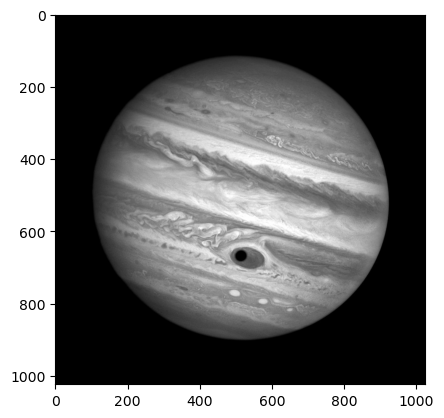

In [24]:
plt.imshow(img)

In [ ]:
def rgb2gray(rgb):
    red, green, blue = rgb[:, :, 0], rgb[:, :, 1], rgb[:, :, 2]
    return .299 * red + .587 * green + .114 * blue

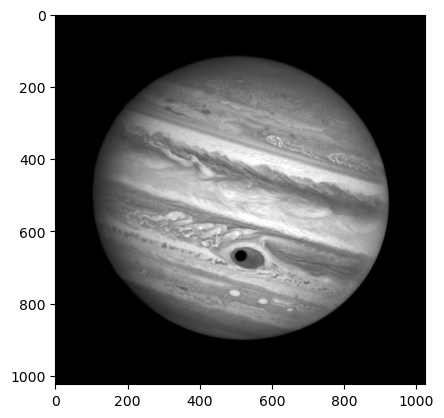

In [27]:
grayimg = rgb2gray(img)
plt.imshow(grayimg, cmap="gray")

In [28]:
u, s, vh = np.linalg.svd(grayimg)

In [73]:
loss = 0.3
k = np.argmax(s.cumsum() / s.sum() > (1 - loss))
k

19

In [74]:
u.shape, s.shape, vh.shape

((1024, 1024), (1024,), (1024, 1024))

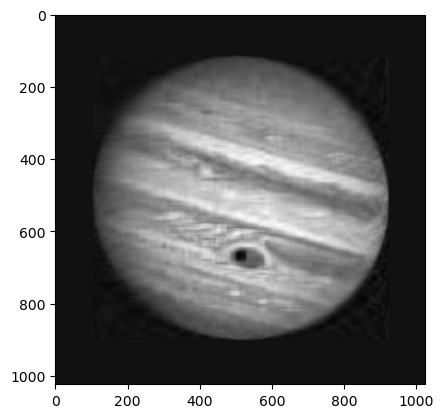

In [78]:
recovered = u[:, :k] @ np.diag(s[:k]) @ vh[:k, :]
plt.imshow(recovered, cmap="gray")

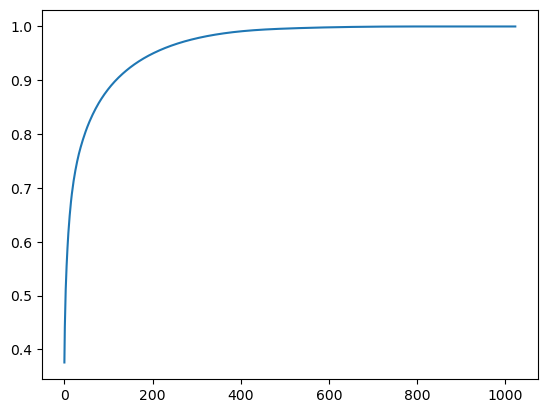

In [40]:
plt.plot(s.cumsum() / s.sum())

In [68]:
import pickle as pkl
pkl.dump(grayimg, open("gray-jupiter.pkl", "wb"))
pkl.dump((u[:, :k], s[:k], vh[:k, :]), open("compressed-gray-jupiter.pkl", "wb"))

In [34]:
s.cumsum() / s.sum() > (1 - loss)

array([False, False, False, ...,  True,  True,  True])

In [69]:
grayimg.shape

(1024, 1024)

In [71]:
[x.shape for x in (u[:, :k], s[:k], vh[:k, :])]

[(1024, 19), (19,), (19, 1024)]

In [77]:
19*2/1024 * 8400

311.71875

In [104]:
import matplotlib.image

matplotlib.image.imsave('gray-jupiter.png', grayimg)
matplotlib.image.imsave('recovered-gray-jupiter.png', recovered)

In [129]:
from PIL import Image
import numpy as np
a = np.zeros((5, 5))
orig = Image.fromarray(np.uint8(grayimg), mode='L')
rec = Image.fromarray(np.uint8(np.clip(recovered, 0, 255)), mode='L')

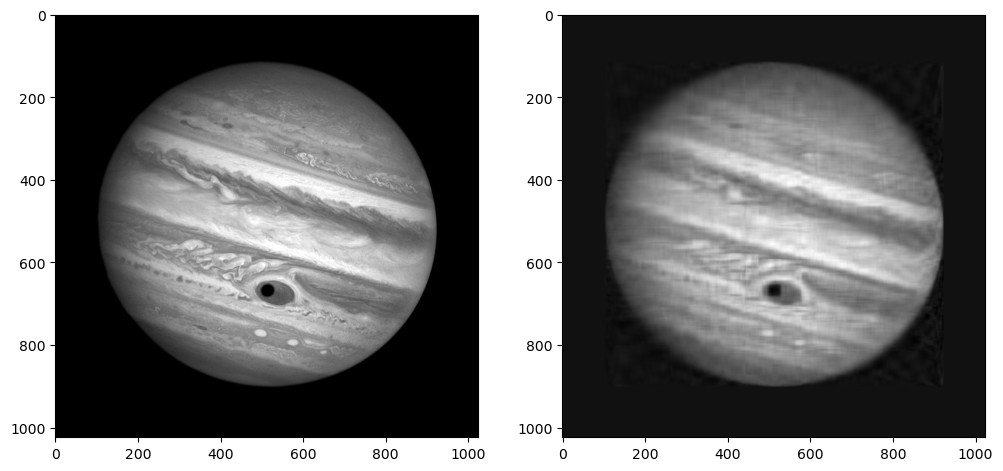

In [130]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(grayimg, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(recovered, cmap="gray")

In [131]:
orig.save("orig.png")

In [132]:
rec.save("rec.png")

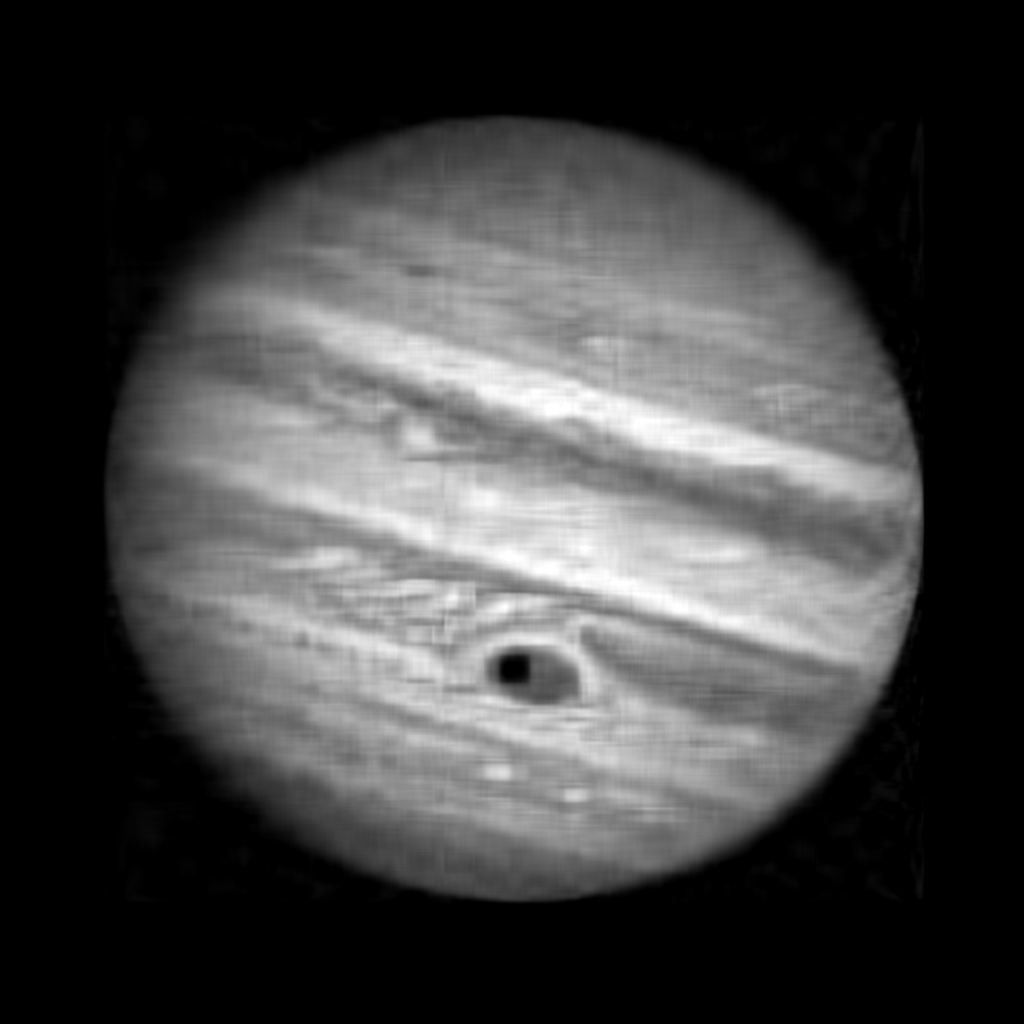

In [133]:
rec

In [135]:
A

NameError: name 'A' is not defined